In [4]:
!pip install pytorch-tabular

<IPython.core.display.Javascript object>

In [5]:
# Install libraries
import numpy as np
import pandas as pd

# Google drive mount
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/COMP685')

# Avoids scroll-in-the-scroll in the entire Notebook
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Transformers for Tabular Data: TabTransformer Deep Dive  
https://towardsdatascience.com/transformers-for-tabular-data-tabtransformer-deep-dive-5fb2438da820  

PyTorch Tabular  
https://pytorch-tabular.readthedocs.io/en/latest/  
https://www.kaggle.com/code/taikimori/um-pytorch-tabular-train-inference  






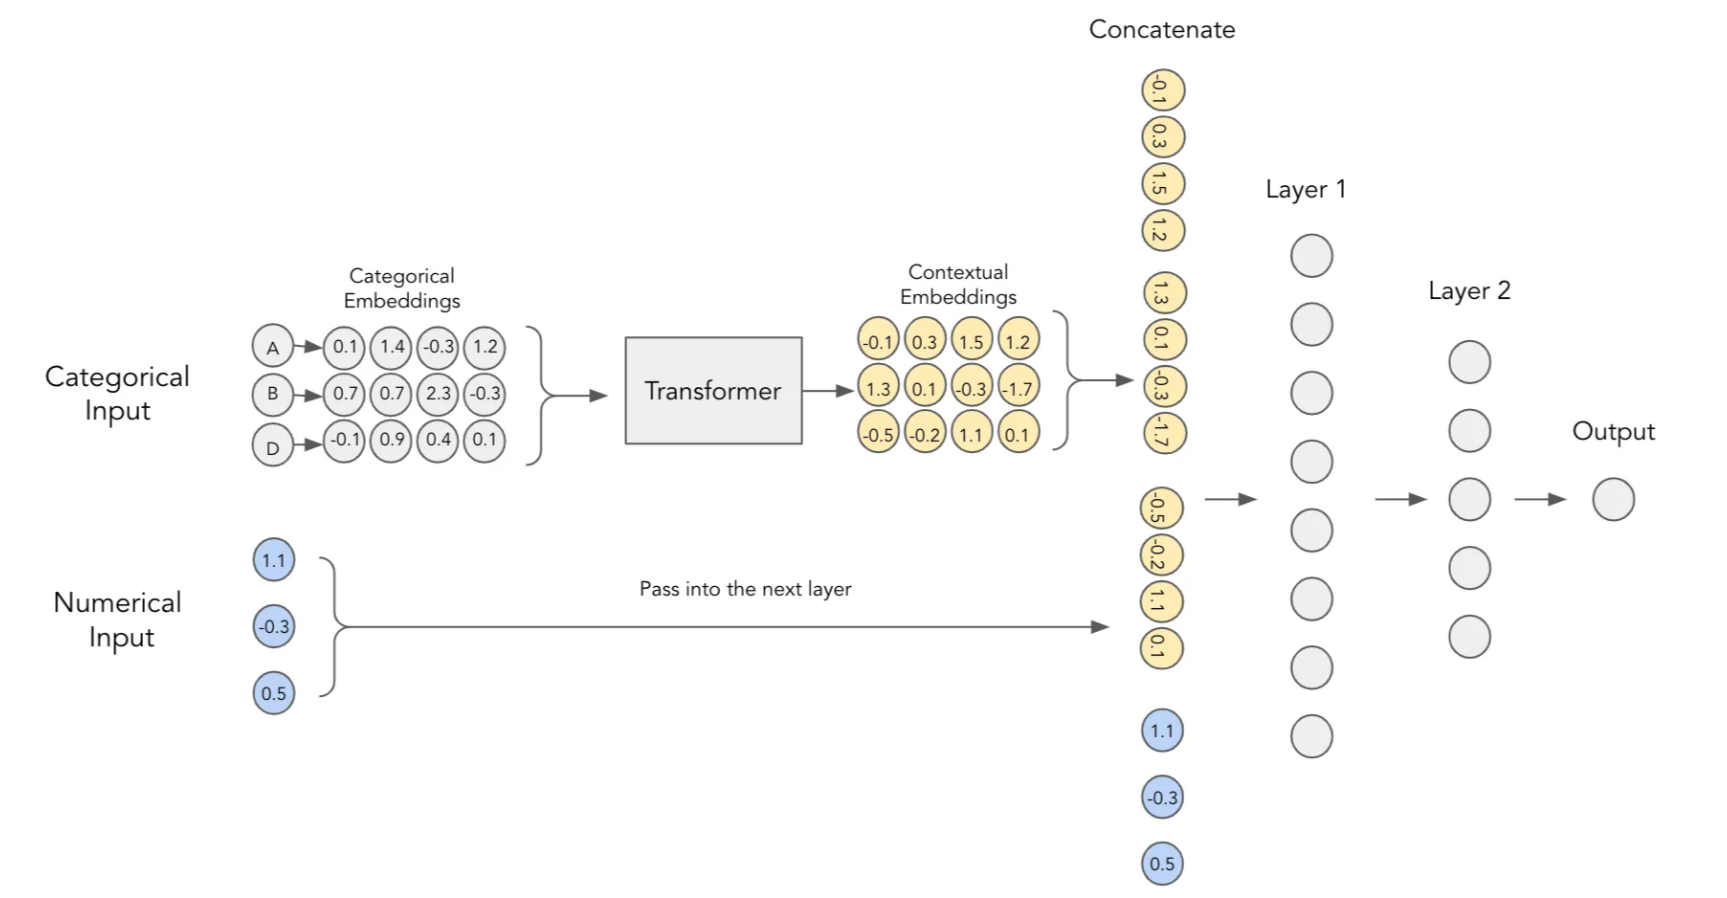

Reference: https://towardsdatascience.com/transformers-for-tabular-data-tabtransformer-deep-dive-5fb2438da820

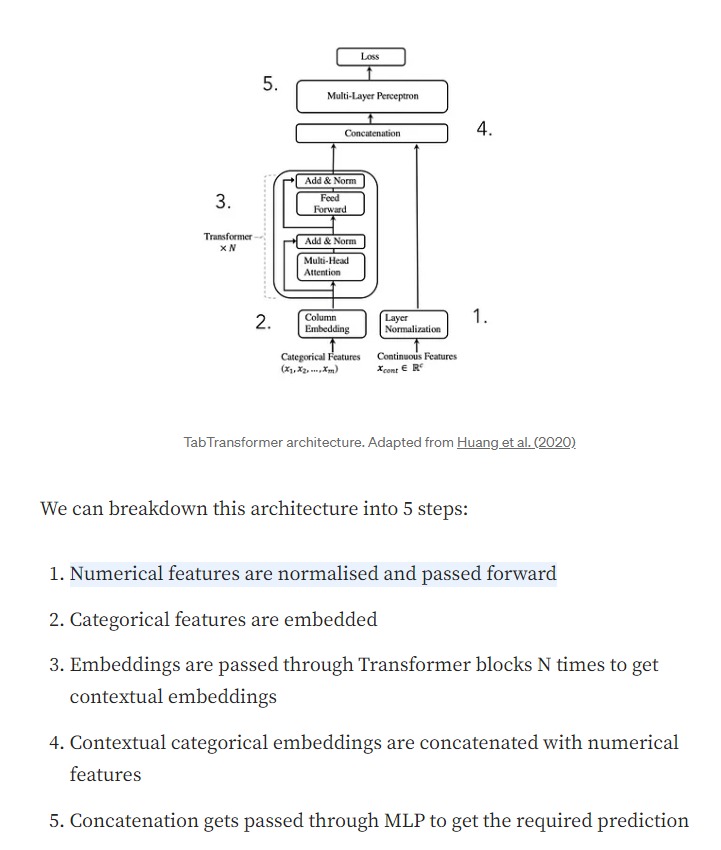

Reference: https://towardsdatascience.com/transformers-for-tabular-data-tabtransformer-deep-dive-5fb2438da820

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pytorch_tabular import TabularModel
from pytorch_tabular.models import TabTransformerConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig

import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
df = pd.read_csv('data/testD-1.csv')
df.head(5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Waybill Date,Origin,Origin-St,Destination,Destination-St,Commodity,Railcars-Containers,Rail-Miles,Net-Weight-Tons,Metric-Tonnes,Rail-km,Rail-GHG-Emissions-Tonnes,Truck-GHG-Emissions-Tonnes
0,2024-09-06,ROBERTS BANK,BC,EDMONTON INTER TERM,AB,Rhubarb,1,766.3,24,21.77,1233.21,0.34,2.07
1,2024-08-06,ROBERTS BANK,BC,BRAMPTON INTER TERM,ON,Barley,1,2757.8,23,20.87,4438.13,1.18,7.15
2,2024-08-06,ROBERTS BANK,BC,BRAMPTON INTER TERM,ON,Llamas,1,2757.8,9,8.16,4438.13,0.46,2.80
3,2024-08-06,ROBERTS BANK,BC,BRAMPTON INTER TERM,ON,Spinach,1,2757.8,23,20.87,4438.13,1.18,7.15
4,2024-08-06,ROBERTS BANK,BC,BRAMPTON INTER TERM,ON,Parsnip,1,2757.8,23,20.87,4438.13,1.18,7.15


In [8]:
categorical_columns = [
    'Waybill Date', 'Origin', 'Origin-St',
    'Destination', 'Destination-St', 'Commodity'
]

numerical_columns = [
    'Railcars-Containers', 'Rail-Miles',
    'Net-Weight-Tons', 'Metric-Tonnes', 'Rail-km'
]

target_columns = ['Rail-GHG-Emissions-Tonnes', 'Truck-GHG-Emissions-Tonnes']

# Create Data Configuration
# https://pytorch-tabular.readthedocs.io/en/latest/tutorials/02-Exploring%20Advanced%20Features%20with%20PyTorch%20Tabular/#1-dataconfig
data_config = DataConfig(
    target=target_columns,
    continuous_cols=numerical_columns,
    categorical_cols=categorical_columns,
    continuous_feature_transform=None,
    normalize_continuous_features=True
)

# Create TabTransformer Configuration
# https://pytorch-tabular.readthedocs.io/en/latest/apidocs_model/#pytorch_tabular.models.TabTransformerConfig
model_config = TabTransformerConfig(
    task="regression",
    metrics=["mean_squared_error", "r2_score"],
    metrics_params=[{}, {}],
    num_heads=4,  # The number of attention heads in the transformer encoder.
    input_embed_dim=32, # Embedding dimension size for categorical features.
    share_embedding=True, # Allows shared embeddings for categorical columns.
    ff_dropout=0.1, # Dropout rate for regularization in feed-forward layers.
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# Create Trainer Configuration
# https://pytorch-tabular.readthedocs.io/en/latest/training/#pytorch_tabular.config.TrainerConfig
trainer_config = TrainerConfig(
    batch_size=64,
    max_epochs=10,
    auto_lr_find=True,
    early_stopping_patience=5,
    checkpoints=None,
    accelerator="auto"
)

# Create Optimizer Configuration
# https://pytorch-tabular.readthedocs.io/en/latest/apidocs_config/#pytorch_tabular.config.OptimizerConfig
optimizer_config = OptimizerConfig(
      optimizer="AdamW",
      optimizer_params={
          "weight_decay": 1e-5
      },
      lr_scheduler="ReduceLROnPlateau", # Reduces the learning rate when validation performance stops improving.
  )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Initialize and train the model
# https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/
model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

# Fit the model
model.fit(train=train_df, validation=test_df)

# Predict on test data
predictions = model.predict(test_df)
predictions

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Auto LR Find Started


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.00017378008287493763
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/My Drive/COMP685/.lr_find_9b877cc0-8bc1-4888-a175-7b08232e5042.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/drive/My Drive/COMP685/.lr_find_9b877cc0-8bc1-4888-a175-7b08232e5042.ckpt
INFO:pytorch_tabular.tabular_model:Suggested LR: 0.00017378008287493763. For plot and detailed analysis, use `find_learning_rate` method.
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  173 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │ 11.7 K │ train │
│ 2 │ _head            │ LinearHead             │    396 │ train │
│ 3 │ loss             │ MSELoss                │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 185 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 185 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 131                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed


,Rail-GHG-Emissions-Tonnes_prediction,Truck-GHG-Emissions-Tonnes_prediction
1103,0.508204,1.994556
2338,0.390471,3.486713
7200,0.499982,2.672640
4013,0.101363,2.418801
2684,0.664358,3.517114
...,...,...
2487,0.215173,1.893922
2683,0.567147,3.082769
1086,0.964914,4.804367
3303,0.799649,4.167934


In [11]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

target = ['Rail-GHG-Emissions-Tonnes', 'Truck-GHG-Emissions-Tonnes']
target_pred = ['Rail-GHG-Emissions-Tonnes_prediction', 'Truck-GHG-Emissions-Tonnes_prediction']


mse_rail = mean_squared_error(test_df[target[0]], predictions[target_pred[0]])
r2_rail = r2_score(test_df[target[0]], predictions[target_pred[0]])
mae_rail = mean_absolute_error(test_df[target[0]], predictions[target_pred[0]])
mape_rail = mean_absolute_percentage_error(test_df[target[0]], predictions[target_pred[0]])
rmse_rail = root_mean_squared_error(test_df[target[0]], predictions[target_pred[0]])
print(f"\nMetrics for {target_pred[0]}:")
print(f"MSE: {mse_rail:.4f}")
print(f"R2 Score: {r2_rail:.4f}")
print(f"MAE: {mae_rail:.4f}")
print(f"MAPE: {mape_rail:.4f}")
print(f"RMSE: {rmse_rail:.4f}")


mse_truck = mean_squared_error(test_df[target[1]], predictions[target_pred[1]])
r2_truck = r2_score(test_df[target[1]], predictions[target_pred[1]])
mae_truck = mean_absolute_error(test_df[target[1]], predictions[target_pred[1]])
mape_truck = mean_absolute_percentage_error(test_df[target[1]], predictions[target_pred[1]])
rmse_truck = root_mean_squared_error(test_df[target[1]], predictions[target_pred[1]])
print(f"\nMetrics for {target_pred[1]}:")
print(f"MSE: {mse_truck:.4f}")
print(f"R2 Score: {r2_truck:.4f}")
print(f"MAE: {mae_truck:.4f}")
print(f"MAPE: {mape_truck:.4f}")
print(f"RMSE: {rmse_truck:.4f}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Metrics for Rail-GHG-Emissions-Tonnes_prediction:
MSE: 0.0281
R2 Score: 0.8110
MAE: 0.1303
MAPE: 0.4794
RMSE: 0.1676

Metrics for Truck-GHG-Emissions-Tonnes_prediction:
MSE: 2.7176
R2 Score: 0.5002
MAE: 1.2390
MAPE: 0.6543
RMSE: 1.6485
